# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata,study_results, on =["Mouse ID"])


# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
merged_data["Mouse ID"].nunique()  

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_id =merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicated_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = merged_data.loc[merged_data['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merged_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse)==False]
clean_merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
Unique_mice = clean_merged_data["Mouse ID"].nunique()
Unique_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_mean = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).mean()
single_median = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).median()
single_varience = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).var()
single_std = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).std()
single_Stderr = clean_merged_data["Tumor Volume (mm3)"].groupby(clean_merged_data["Drug Regimen"]).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

single_summary = pd.DataFrame({"Mean Tumor Volume":single_mean, 
                            "Median Tumor Volume":single_median, 
                           "Tumor Volume Variance":single_varience, 
                           "Tumor Volume Std. Dev.":single_std, 
                           "Tumor Volume Std. Err.":single_Stderr})

single_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

single_summary_aggregation = clean_merged_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])

single_summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

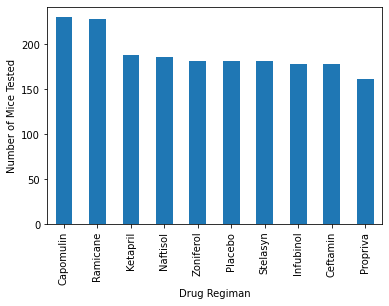

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

mice_tested = clean_merged_data["Drug Regimen"].value_counts()

bar_mice = mice_tested.plot.bar()

plt.xlabel("Drug Regiman")
plt.ylabel("Number of Mice Tested")

plt.show()

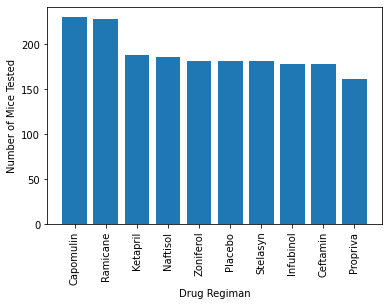

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_tested.index.values
y_axis = mice_tested.values

plt.bar(x_axis, y_axis, align = "center")


plt.xlabel("Drug Regiman")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()


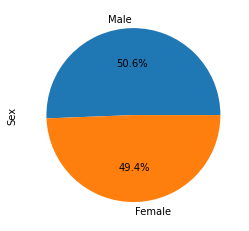

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_data = clean_merged_data["Sex"].value_counts()
Sex_data.plot.pie(autopct= "%1.1f%%")
plt.show()



([<matplotlib.patches.Wedge at 0x1f7eacf10c8>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '50.6%'),
  Text(0.011450456439592244, -0.5998907292560246, '49.4%')])

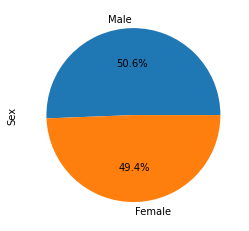

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]

# The values of each section of the pie chart
males = clean_merged_data.loc[clean_merged_data["Sex"] == "Male"]
males = males["Sex"].count()
females =  clean_merged_data.loc[clean_merged_data["Sex"] == "Female"]
females = females["Sex"].count()
mice_sex = males + females

males_perc = males/mice_sex*100
females_perc = females/mice_sex*100

sizes = [males_perc,females_perc]


# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0)


plt.ylabel('Sex')

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
Capomulin=clean_merged_data.loc[clean_merged_data["Drug Regimen"] == "Capomulin",:]
Ramicane=clean_merged_data.loc[clean_merged_data["Drug Regimen"] == "Ramicane",:]
Infubinol= clean_merged_data.loc[clean_merged_data["Drug Regimen"] == "Infubinol",:]
Ceftamin=clean_merged_data.loc[clean_merged_data["Drug Regimen"] == "Ceftamin",:]


# Start by getting the last (greatest) timepoint for each mouse
Capomulin_great = Capomulin.groupby("Mouse ID").max()["Timepoint"]
Capomulin_df = pd.DataFrame(Capomulin_great)
Ramicane_great = Ramicane.groupby("Mouse ID").max()["Timepoint"]
Ramicane_df = pd.DataFrame(Ramicane_great)
Infubinol_great = Infubinol.groupby("Mouse ID").max()["Timepoint"]
Infubinol_df = pd.DataFrame(Infubinol_great)
Ceftamin_great = Ceftamin.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_df = pd.DataFrame(Ceftamin_great)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
third_gd_merge = pd.merge(Capomulin_df,clean_merged_data, on = ("Mouse ID","Timepoint"), how = "left")
third_gd_merge.head()
fourth_gd_merge = pd.merge(Ramicane_df,clean_merged_data, on = ("Mouse ID","Timepoint"), how = "left")
fourth_gd_merge.head()
fifth_gd_merge = pd.merge(Infubinol_df,clean_merged_data, on = ("Mouse ID","Timepoint"), how = "left")
fifth_gd_merge.head()
sixth_gd_merge = pd.merge(Ceftamin_df,clean_merged_data, on = ("Mouse ID","Timepoint"), how = "left")
sixth_gd_merge.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
data_for_plotting = [third_gd_merge, fourth_gd_merge, fifth_gd_merge, sixth_gd_merge]

Cap= third_gd_merge["Tumor Volume (mm3)"]
Ram= fourth_gd_merge["Tumor Volume (mm3)"]
Inf= fifth_gd_merge["Tumor Volume (mm3)"]
Cef= sixth_gd_merge["Tumor Volume (mm3)"]


plots = [Cap,Ram,Inf,Cef]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in range(len(treatments)):
    tumors = (data_for_plotting[x])["Tumor Volume (mm3)"]
    quartiles =tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of {treatments[x]} tumors is: {lowerq}")
    print(f"The upper quartile of {treatments[x]} tumors is: {upperq}")
    print(f"The interquartile range of {treatments[x]} tumors is: {iqr}")
    print(f"The median of {treatments[x]} tumors is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The median of Capomulin tumors is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The lower quartile of Ceftamin tumors is: 48

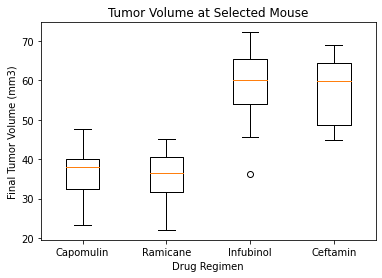

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plots, labels=treatments, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

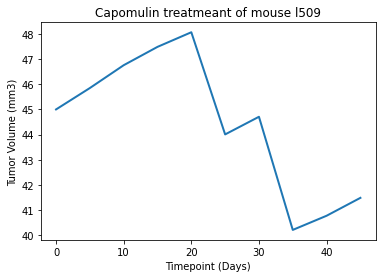

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_df = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
y_axis = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, y_axis,linewidth=2, markersize=15 ,label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

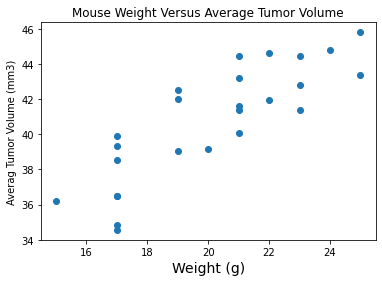

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots()
Capomulin_Avg =Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(Capomulin_Avg['Weight (g)'],Capomulin_Avg['Tumor Volume (mm3)'])
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
The r-squared is: 0.709


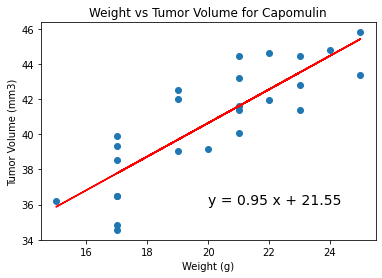

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_Avg['Weight (g)'],Capomulin_Avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= linregress(Capomulin_Avg["Weight (g)"],Capomulin_Avg["Tumor Volume (mm3)"])
regress_values=Capomulin_Avg["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(Capomulin_Avg["Weight (g)"],Capomulin_Avg["Tumor Volume (mm3)"])
plt.plot(Capomulin_Avg["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()